**A Decision Tree is a supervised machine learning algorithm used for classification and regression problems.**
**It works like a flowchart, where:**

**Each internal node represents a decision (like a question on a feature),**

**Each branch represents an outcome of the decision,**

**Each leaf node represents a final output (a class or value).**



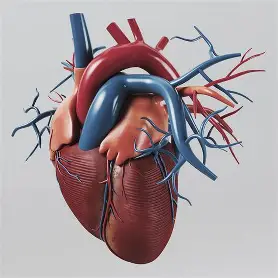

dataset link :

https://drive.google.com/drive/folders/1djWGRu5sfBh8O_9LVU0QqOCA9pqNgCD4?usp=sharing

In [ ]:
"# step1:

iPirates of the Caribbean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
}"{:?P># step 2:

#(loading dataset file)

df = pd.read_csv('/content/heart (1).csv')

NameError: name 'pd' is not defined

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# step3:
# eda

df.shape


(303, 14)

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#step 4 - data cleaning

#1. check for null values
#2. check for duplicates
#3. check for outliers

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#  null values in numerical values --  replace it with mean /median of the column , fillna
# null values in string colun - replace it with mode


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace  = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# check for outliers

col = list(df.columns)
col

NameError: name 'df' is not defined

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


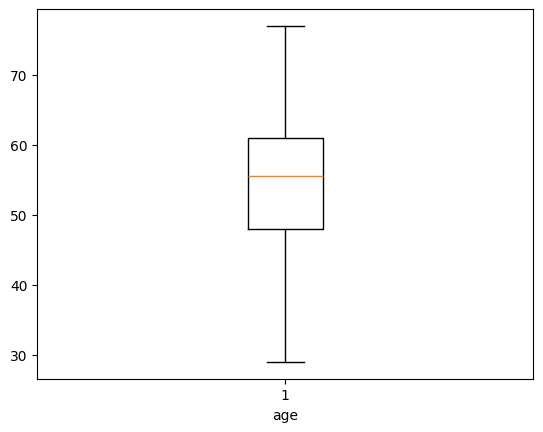

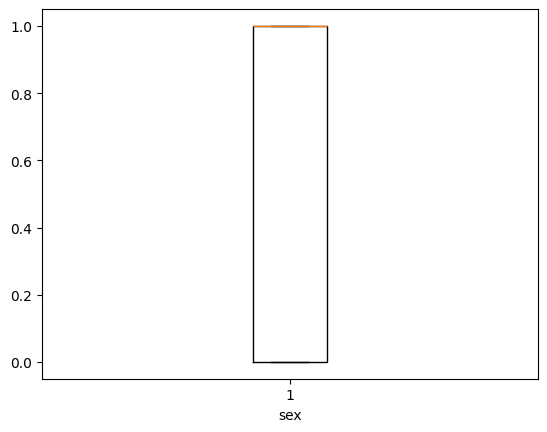

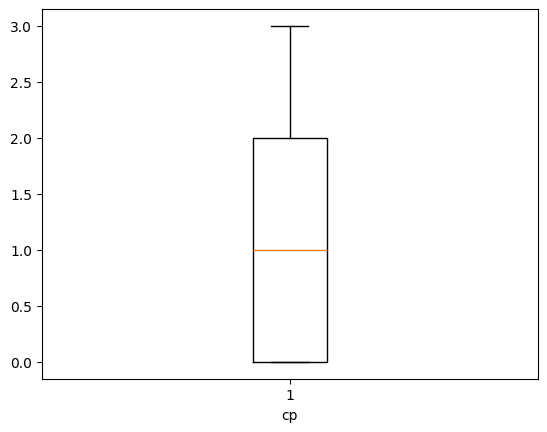

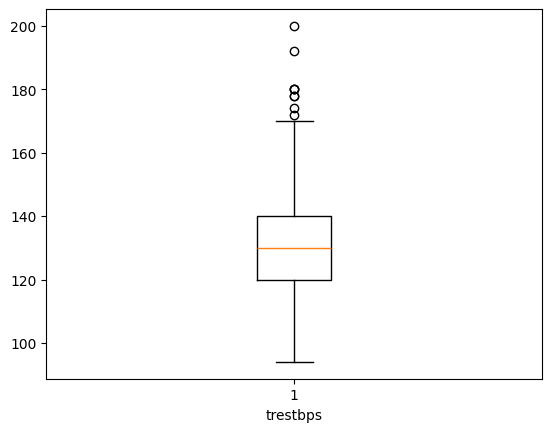

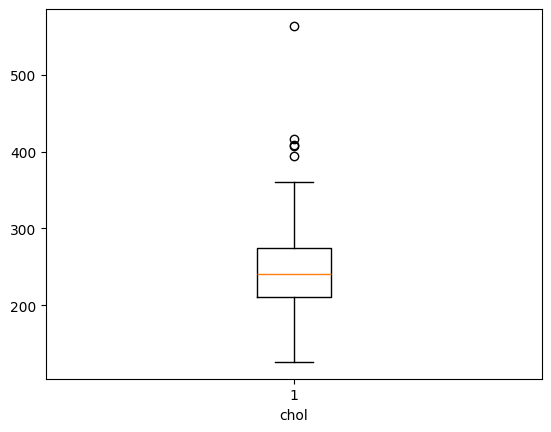

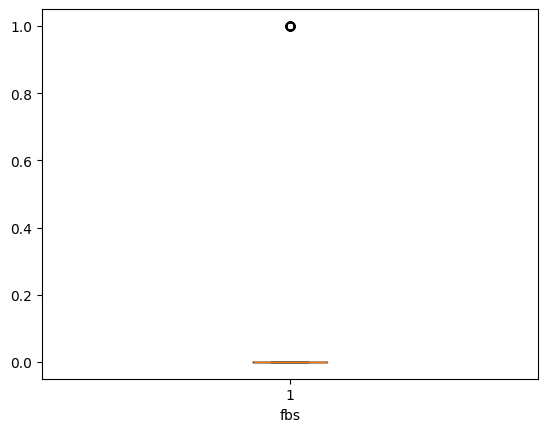

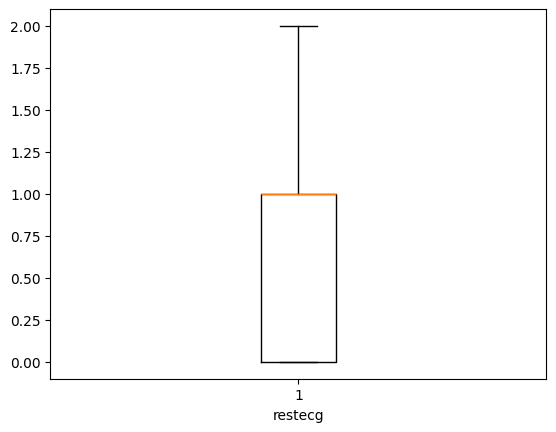

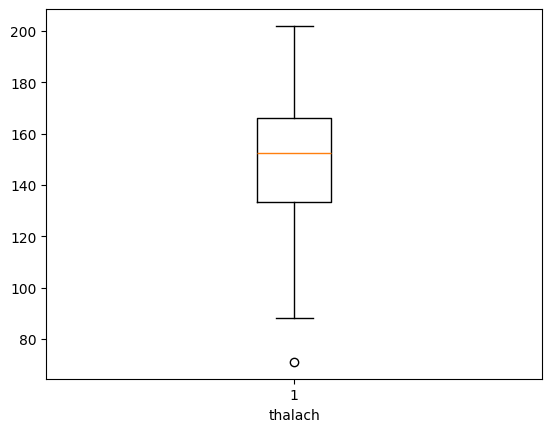

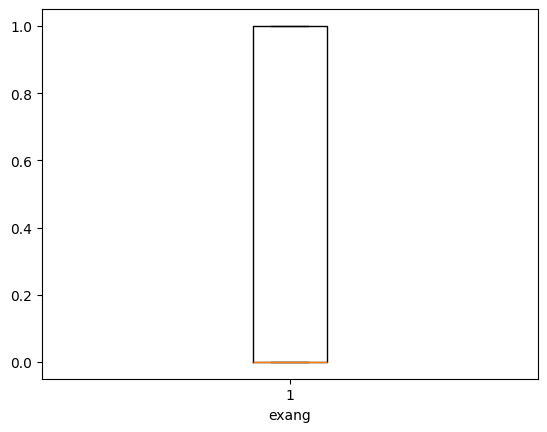

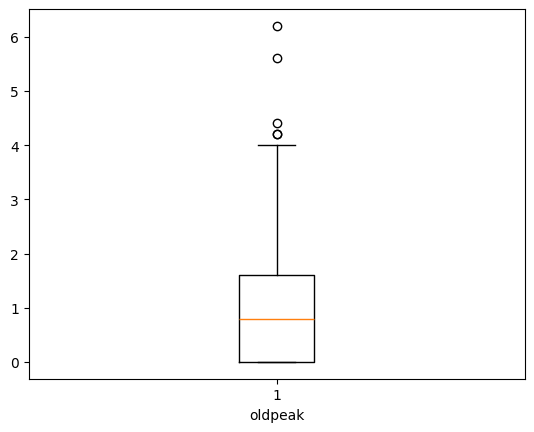

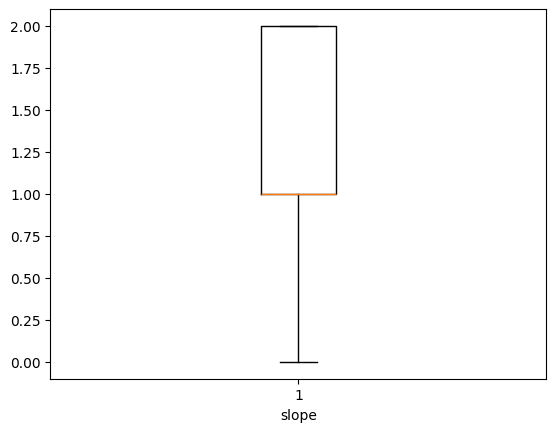

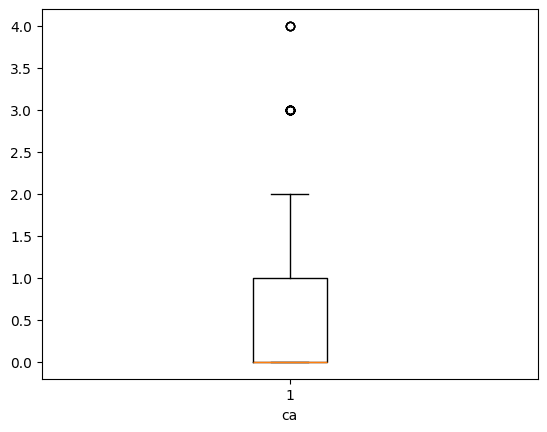

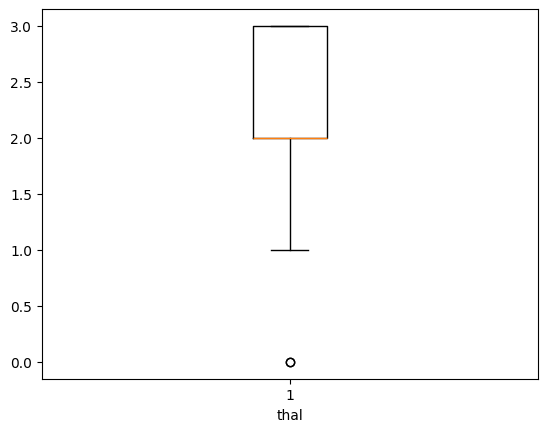

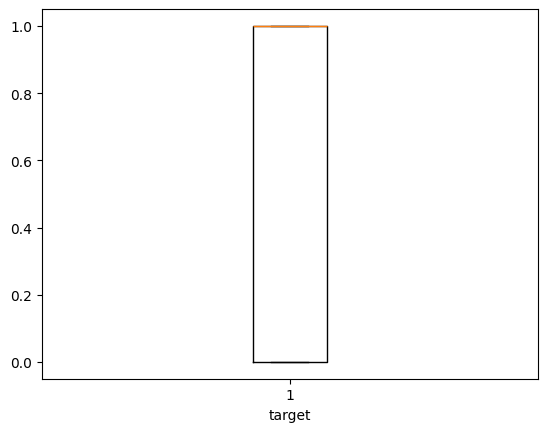

In [ ]:
for i in col:
  if (df[i].dtypes =="int64" or df[i].dtypes =="float64"):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

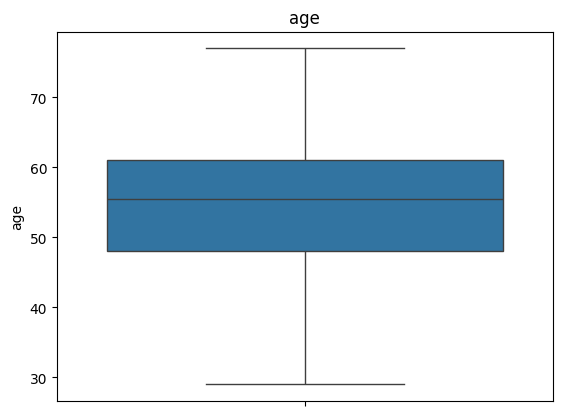

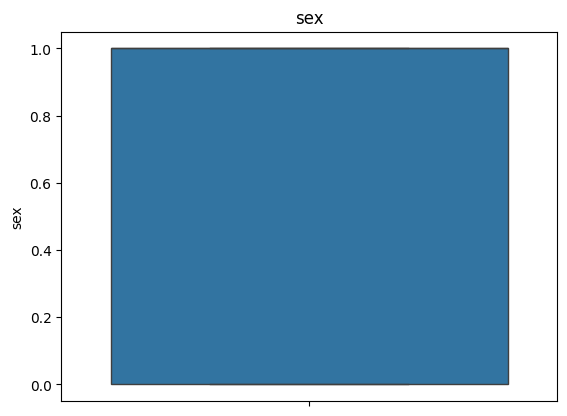

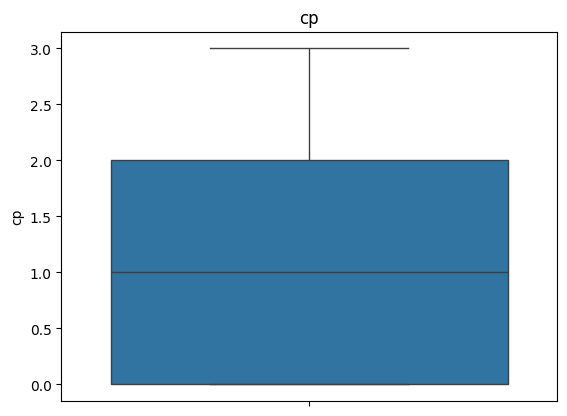

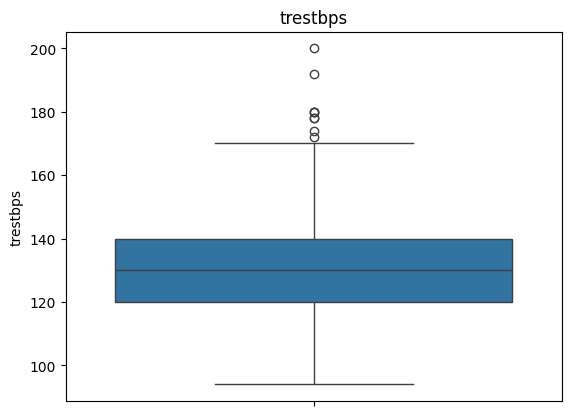

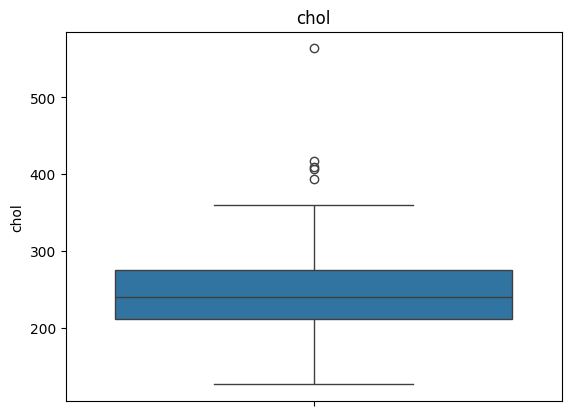

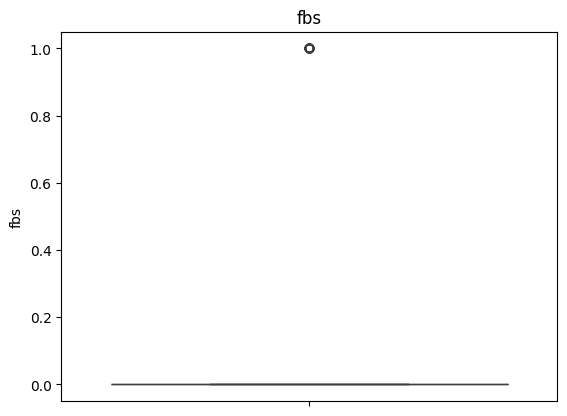

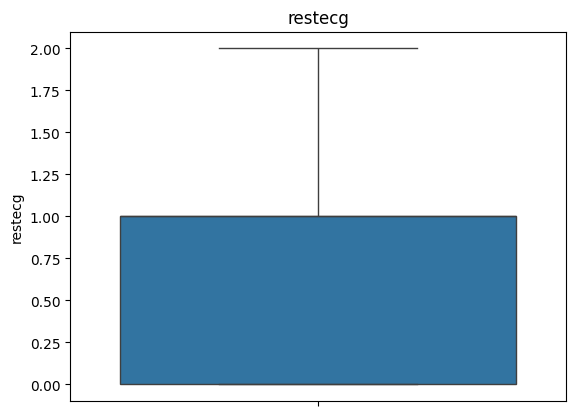

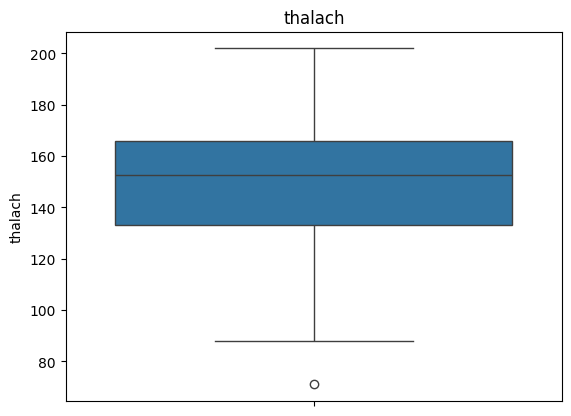

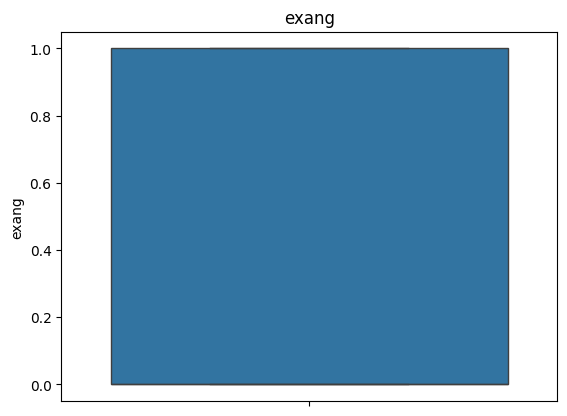

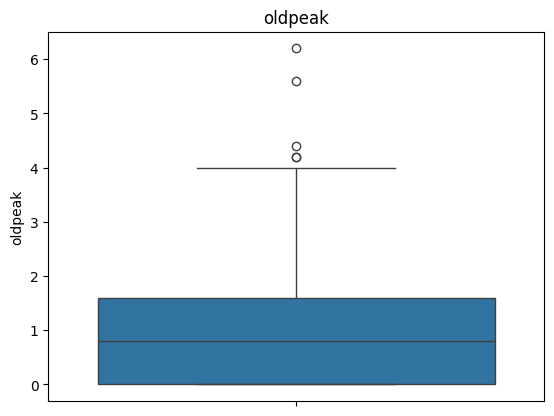

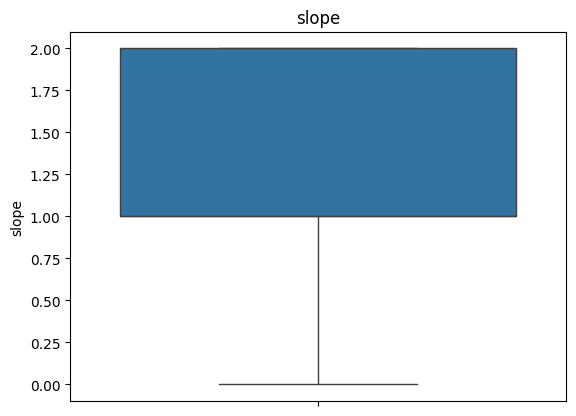

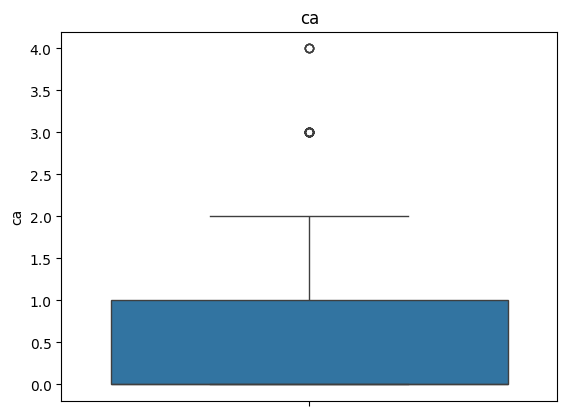

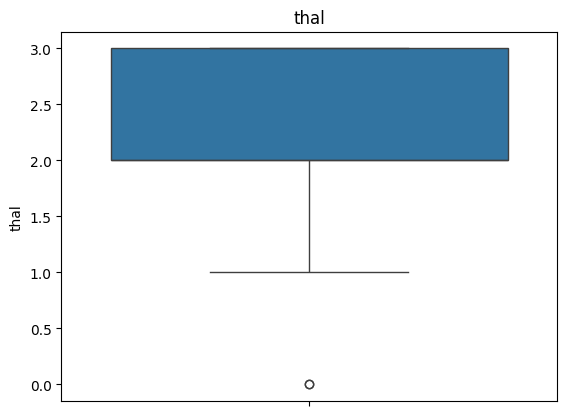

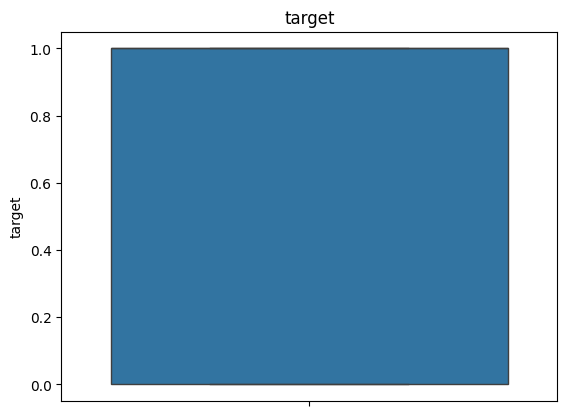

In [ ]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# decision tree are not sensitive to outliers

# decision is split the data based feature values to from branches


<Axes: >

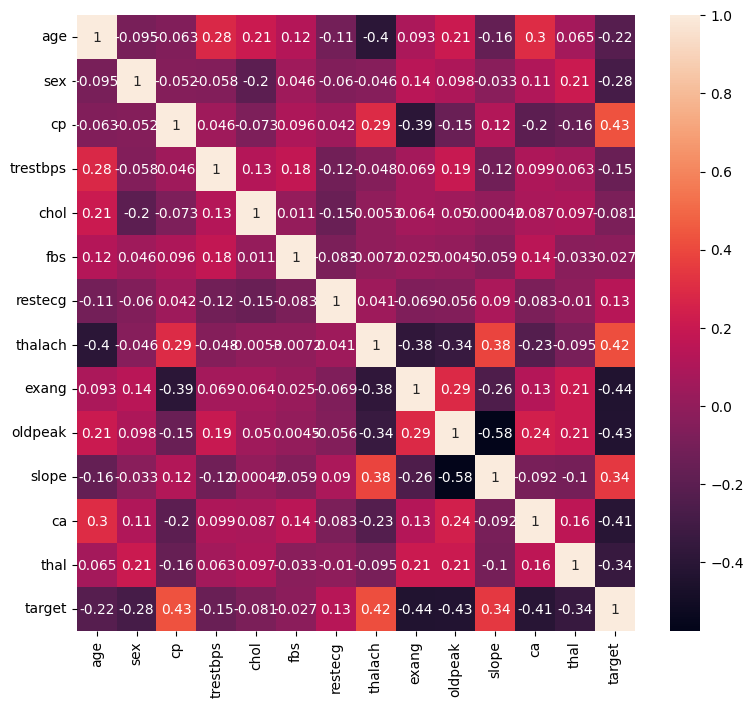

In [ ]:
#  check for correlation whether is there any high correlation

plt.figure(figsize =(9,8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# step 5 : model buidling

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# step 6:
x = df.drop(columns =['target'])

y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

In [ ]:
model = DecisionTreeClassifier(random_state= 42)


In [ ]:
# train the model

model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [ ]:
comparison = pd.DataFrame({
    'actual' : y_test,
    'predicted' :y_pred
})

print(comparison)

     actual  predicted
180       0          0
229       0          0
111       1          1
247       0          0
60        1          1
..      ...        ...
251       0          0
19        1          0
143       1          0
79        1          0
144       1          1

[91 rows x 2 columns]


In [ ]:
# accuracy is the percentage of correct predictions made by the model out of all predictions

accuracy_score(y_test,y_pred)

0.8241758241758241

In [ ]:
# confusion martix

cm = confusion_matrix(y_test, y_pred)

print(cm)
# 36 people are actually classified having not disease

# false positive - 11 people are not having heart disase but we predicted they are having
# heart disease

# false negative -  6 people are having heart disease but predicted they dont heart disase
# 38  true positive - model correctly predicted 38 people  have disease

[[36  6]
 [11 38]]


[Text(0.4765625, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 211\nvalue = [96.0, 115.0]'),
 Text(0.25, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.395\nsamples = 96\nvalue = [70, 26]'),
 Text(0.36328125, 0.8888888888888888, 'True  '),
 Text(0.16071428571428573, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.08928571428571429, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.03571428571428571, 0.5, 'x[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.017857142857142856, 0.3888888888888889, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.05357142857142857, 0.3888888888888889, 'x[7] <= 163.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.5, 'x[10] <= 1.5\ngini = 0.48

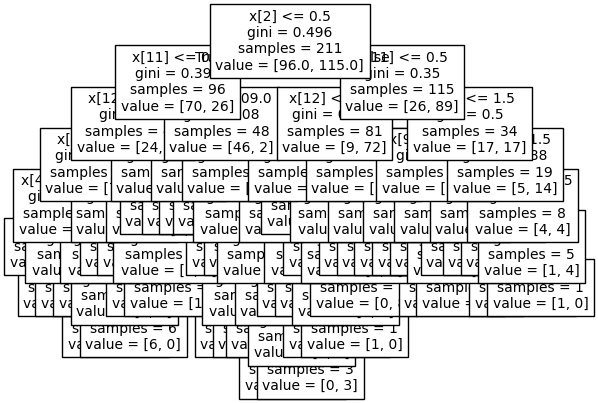

In [ ]:
from sklearn import tree
tree.plot_tree(model , fontsize = 19)

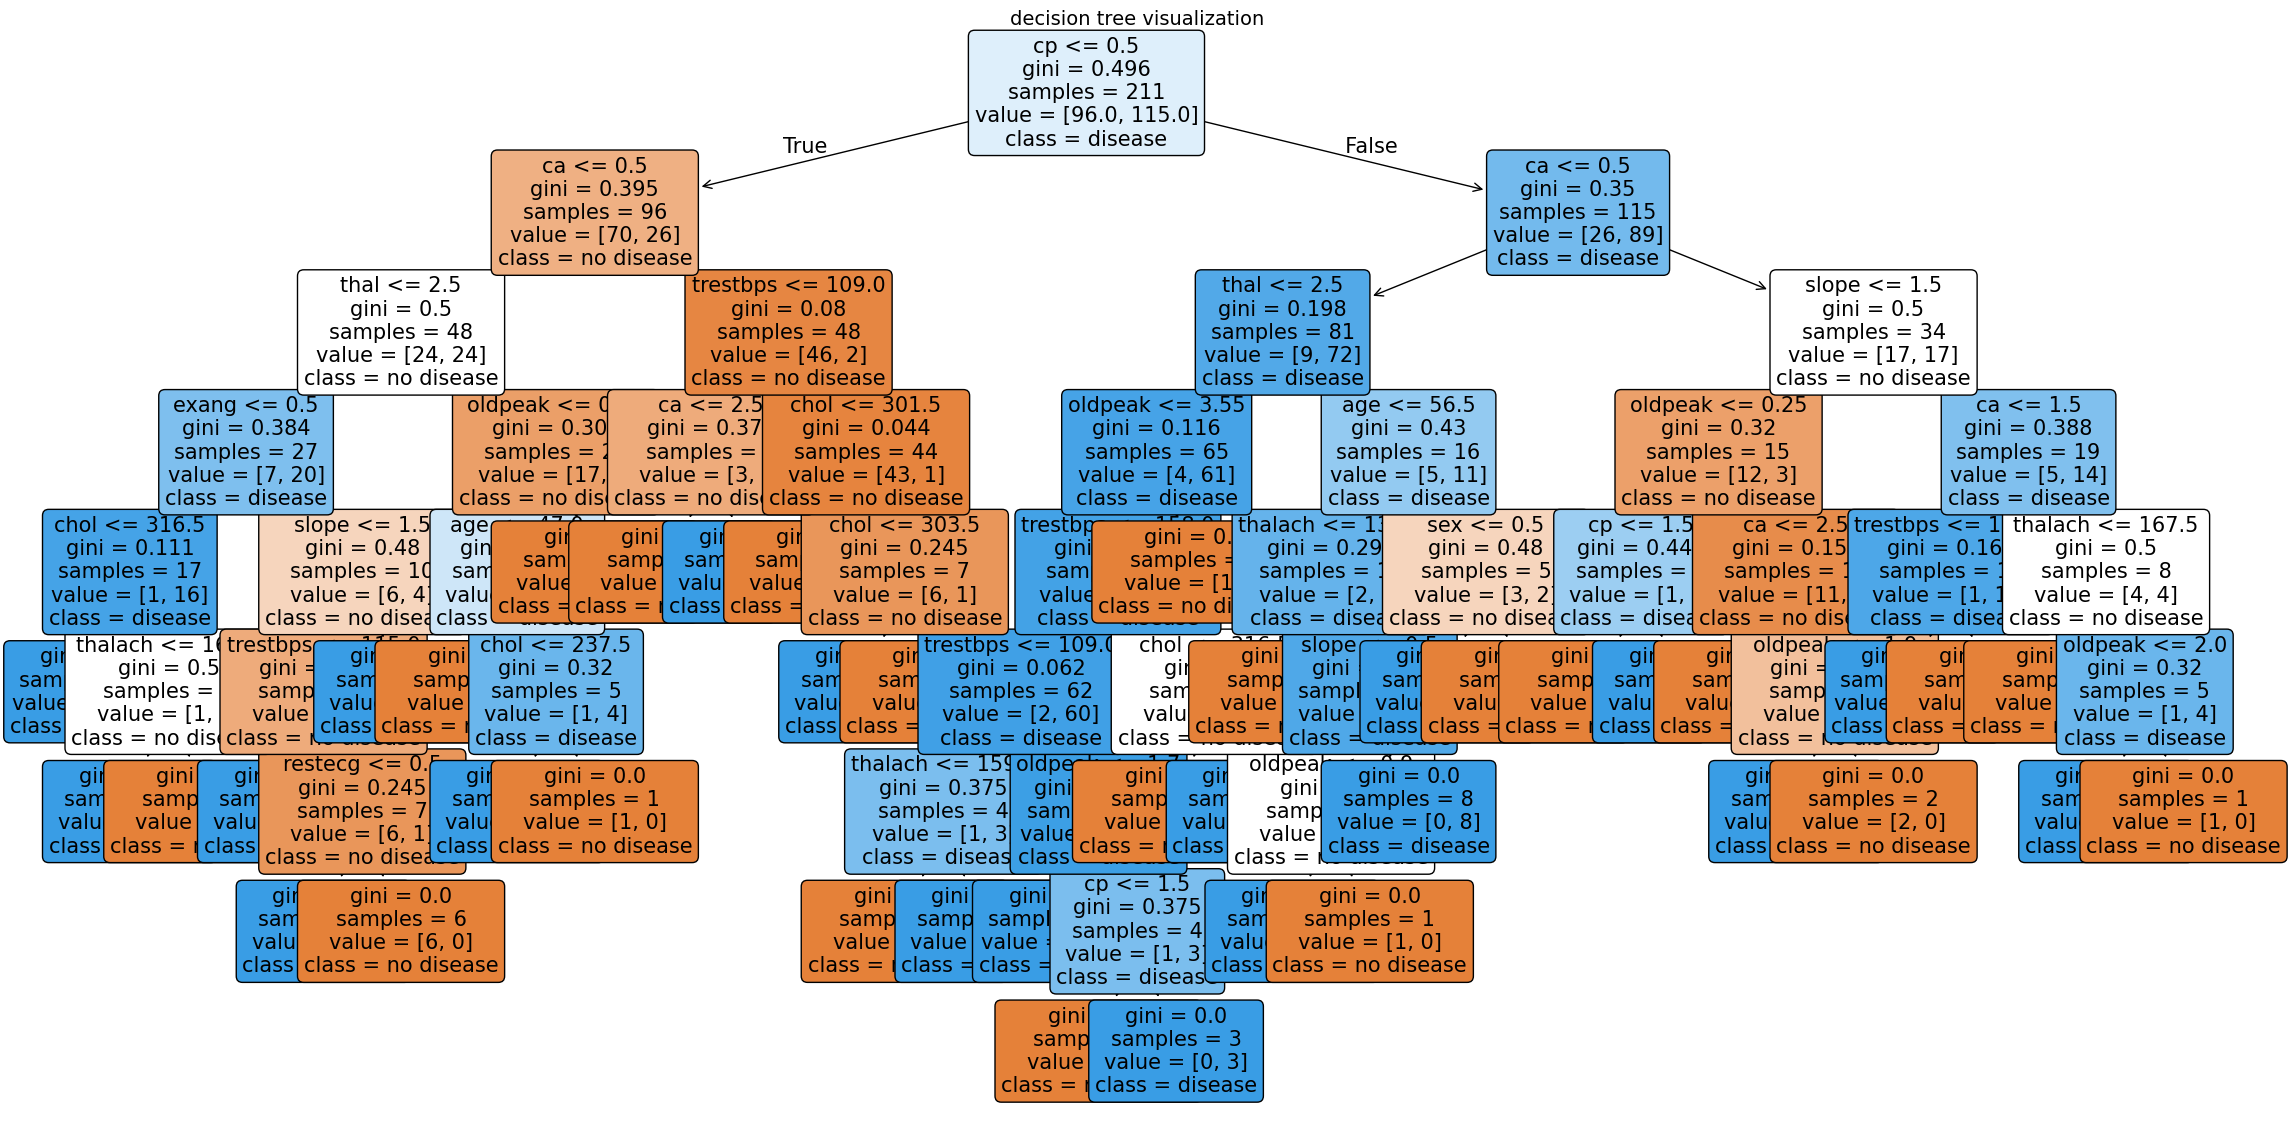

In [ ]:
plt.figure(figsize =(28, 14))
tree.plot_tree(model,
               feature_names = x_train.columns,
               class_names = [' no disease', ' disease'],
               filled = True,
               rounded = True,
               fontsize = 15)
plt.title("decision tree visualization", fontsize = 14)
plt.show()

In [ ]:
tree = model.tree_
total_nodes = tree.node_count
is_leaf = (tree.children_left == -1)& (tree.children_right == -1)
leaf_nodes = np.count_nonzero(is_leaf)
internal_nodes = total_nodes - leaf_nodes
print(internal_nodes)

39


In [ ]:
# the one way of finding good decision tree

In [ ]:
# max_depth -->  it is a parameter that defined the max no of levels (layers) your
#dcision tree is allowed to grow

In [ ]:
# why it is useful

#  prevent overfitting :

# speed up traning :

# improvr visualization

In [ ]:
# if a docter ask too many question that will get complicates
# if a ask too few questions that they might get miss the right diagonismm


#  so we set a balanced limit in your max_depth

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for i in depth:
  model = DecisionTreeClassifier(max_depth = i , random_state =60)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"max depth {i} and accuarcy score {acc}")

max depth 1 and accuarcy score 0.7692307692307693
max depth 2 and accuarcy score 0.6703296703296703
max depth 3 and accuarcy score 0.8351648351648352
max depth 4 and accuarcy score 0.7362637362637363
max depth 5 and accuarcy score 0.7912087912087912
max depth 6 and accuarcy score 0.8241758241758241
max depth 7 and accuarcy score 0.8131868131868132
max depth 8 and accuarcy score 0.8131868131868132
max depth 9 and accuarcy score 0.8131868131868132
max depth 10 and accuarcy score 0.8131868131868132
max depth 11 and accuarcy score 0.8131868131868132
max depth 12 and accuarcy score 0.8131868131868132
max depth 13 and accuarcy score 0.8131868131868132


In [ ]:
model.get_depth() # to give optimal max depth of my model

8

In [ ]:
#hyperparameter tuning:

# a hyperparameter is a setting you choose before training a model


# example:
-10,20,30
# max-depth = how the deep the tree can go

#  min_sample_split = minimum samples needed to split a node
# creterion : how to measure quailty of a split(gini or entropy)

In [ ]:
# types of hyperparameter

# 1. grid search :  try all the possible of the parameter
# you will give a list of values from each parameter
# it tries every possible combination
# pick the best one with best peformance

# 2, randomized search : it choose randomly any combination
#  faster than grid

In [ ]:
from sklearn.model_selection import GridSearchCV

new_model = DecisionTreeClassifier()

grid_params = {"criterion":["gini", "entropy"], 'max_depth' :[1,5,50,100],'random_state':[0,1,2,3,4,5]
               , 'min_samples_split' :[2,6,8,9,3,5,22], 'min_samples_leaf': [1,4,6,7,9]}


# criterion: decide how to split the tree
# max_depth = how the deep can go
# min_sample_split - minimum data points needed to split a node
# min_sample_leaf = minimum datatpoint require in a leaf


gv = GridSearchCV(estimator= new_model , param_grid = grid_params, cv =4)

In [ ]:
# cv  - cross validation

# it is techinque used to evaluate the performance of the model more accurately
# instead of splitting into one train and test the cv will split into multiple
# parameter of trainig and test and will ruun multiple times


# fold - 1to 100

# fold 100 - 200

# fold =200 to 300


# at the end , it takes average accuracy from all the 3 runs to decide which parmeter is best one


In [ ]:
gv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 50, 100],
                         'min_samples_leaf': [1, 4, 6, 7, 9],
                         'min_samples_split': [2, 6, 8, 9, 3, 5, 22],
                         'random_state': [0, 1, 2, 3, 4, 5]})

In [ ]:
# return best parameter for our  model that can give best accuracy

gv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [ ]:
dt_model = gv.best_estimator_

In [ ]:
y_predict1 = dt_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predict1)

0.8131868131868132